In [4]:
import warnings
warnings.filterwarnings('ignore')

## Interactive magics - comment out if running from another script
%matplotlib inline
%qtconsole

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style='darkgrid', palette='muted')
pd.set_option('display.notebook_repr_html', True)
plt.rcParams['figure.figsize'] = 10, 6
np.random.seed(0)

# SVD: Singular Values Decomposition

## Breve presentacion del set de datos iris

In [6]:
iris = sns.load_dataset("iris")
print(iris.shape)
print(type(iris))
iris.head()

(150, 5)
<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

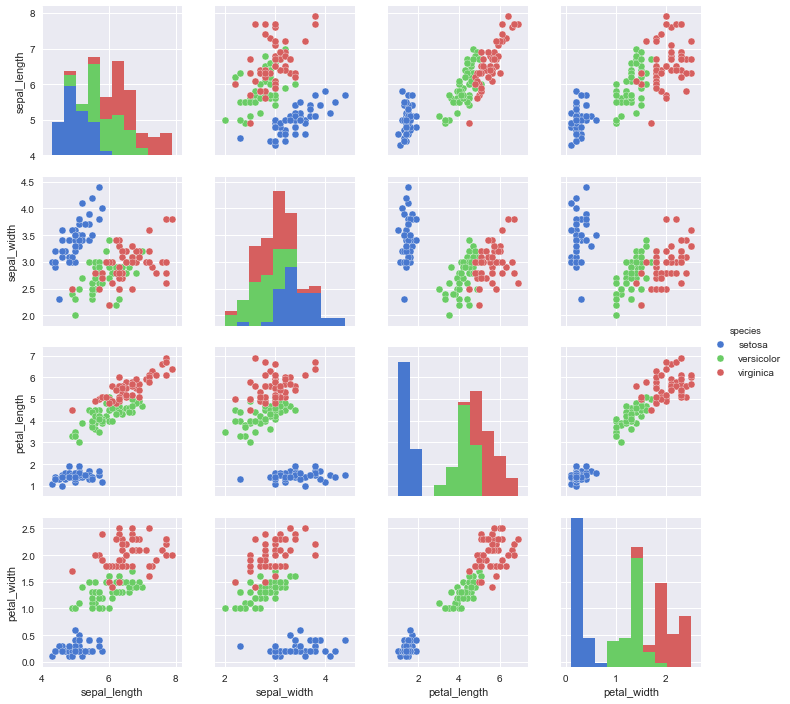

In [10]:
g = sns.pairplot(iris, hue="species")

## Calculando la descomposicion SVD con scipy

In [11]:
# usaremos la implementacion base de svd
from scipy.linalg import svd # https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html
# por otro lado hay otras opciones como svds 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html 
from scipy.sparse.linalg import svds
# la usaremos para verificar el calculo de autovalores/eigenvalues
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html
from scipy.sparse.linalg import eigs

In [12]:
## normalizamos/centramos utilizando la media de tal forma que el promedio sea 0
centered = ((iris).iloc[:,:-1]) - iris.mean()

In [13]:
# 150 filas x 4 columnas
print(centered.shape)

(150, 4)


In [14]:
# calculamos la svd
u, s, vt = svd(centered)

In [15]:
# verificamos U
u

array([[-1.06937444e-01, -5.31164840e-02,  8.17734010e-03, ...,
         5.43380310e-02,  1.96438400e-03,  2.46978090e-03],
       [-1.08133305e-01,  2.94357038e-02,  6.16531816e-02, ...,
         5.12936114e-03,  8.48544595e-02,  5.83496936e-03],
       [-1.15099407e-01,  2.41054172e-02, -5.24368218e-03, ...,
         2.75184277e-02,  1.78604309e-01,  1.49419118e-01],
       ...,
       [ 7.02927688e-02, -1.31144057e-02, -3.82231512e-02, ...,
         9.89532683e-01, -1.25488246e-02, -7.17729676e-04],
       [ 7.57348450e-02, -1.93954931e-02, -2.11868549e-01, ...,
        -1.41206665e-02,  9.52049996e-01, -2.32048811e-02],
       [ 5.53860977e-02,  4.70071528e-02, -1.06310369e-01, ...,
        -8.30595907e-04, -2.19201906e-02,  9.77300244e-01]])

In [16]:
# y sus dimensiones
print(u.shape)

(150, 150)


In [17]:
# verificamos Sigma
# notese que estan ordenados los valores singulares de mayor a menor
s

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [18]:
# y sus dimensiones
print(s.shape)

(4,)


In [19]:
# verificamos Sigma
vt

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [ 0.58202985, -0.59791083, -0.07623608, -0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [20]:
print(vt.shape)

(4, 4)


In [21]:
# revisar como lo estan ploteando y como representar tambien los datos reducidos.
#iris_svd = pd.concat((pd.DataFrame(pc, index=iris.index
#                        , columns=('c0','c1')), iris.loc[:,'species']),1)

#g = sns.lmplot('c0', 'c1', iris_svd, hue='species', fit_reg=False, size=8
#              ,scatter_kws={'alpha':0.7,'s':60})

## Verificando calculo de los valores singulares via calculo de autovalores

In [22]:
# utilizando otro metodo de scipy podemos realizar el calculo
# de autovalores para verificar
np.sqrt(eigs(centered.values.dot(centered.values.T), k=4)[0]).real

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

## Entendiendo la dimensionalidad intrinseca de los datos

Un plot de los valores singulares puede servirnos para tener una buena idea sobre la dimensionalidad intrinseca de nuestro datos. Esto lo podemos lograr buscando los "codos" en particular.

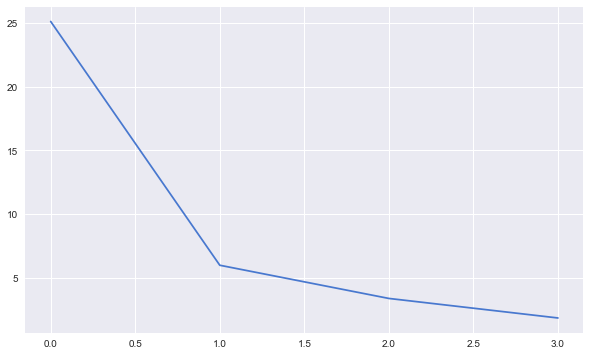

In [23]:
# tener en cuenta que va del autovalor #0 al #3 (son 4)
plt.plot(s)

### Podemos entonces llegar a la siguientes conclusiones

- La dimensionalidad intrinseca de nuestros datos teniendo un codo en el 2 y 3er valor singular, puede estar 2 o 3.
- eliminando el ultimo valor singular perdemos muy poco.

## Calculo de Energia de la Matriz

Esta es otra herramienta que podemos utilizar para entender o analizar la dimensionalidad de los datos.

In [24]:
singular_values = s
# el calculo total de la energia es igual a la suma 
# de los valores singulares al cuadrado
energy_total = sum(singular_values**2)
# de esta forma calculamos la cantidad de energia acumulada por
# cada valor singular
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[92.46187232  5.30664831  1.71026098  0.52121839]


In [25]:
singular_values

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [26]:
# realizamos entonces el calculo de cuanta energia se va
# acumulando con cada uno de los 
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 25.09996044218387 92.46%
Number of Singular Values 2: 6.013147382308731 97.77%
Number of Singular Values 3: 3.413680639192099 99.48%
Number of Singular Values 4: 1.884523508222692 100.0%


### Podemos entonces llegar a la siguientes conclusiones

- Utilizando los dos primeros valores singulares vamos a estar reteniendo el 97.77% de la varianza original de los datos en 4 dimensiones. Es decir con solo 2 vectores de la base V podemos capturar un 97.77 de la matriz.
- Es posible reducir a una unica dimension los datos reteniendo el 92.46% de varianza original de los datos en 4 dimensiones.
- Tomando 3 valores singulares, podemos capturar casi la totalidad de la energia de la matriz.

## Reducción de dimensiones usando la SVD

Con lo analizado anteriormente podemos entonces realizar una reduccion de dimensiones a partir de los valores que hayamos considerado.

In [27]:
# tomando los dos primeros vectores de la base V podemos realizar la 
# siguiente reconstruccion de iris
k = 2
reconstiris = np.matrix(u[:, :k]) * np.diag(s[:k]) * np.matrix(vt[:k, :])

In [28]:
# tener en cuenta que tenemos una dimension que quitamos al principio que 
# es la que indica la categoria
reconstiris.shape

(150, 4)

In [29]:
# podemos verificar el desvio estandard que tenemos en la reconstruccion
np.std(centered - reconstiris)

sepal_length    0.169334
sepal_width     0.173763
petal_length    0.076830
petal_width     0.191295
dtype: float64

In [30]:
# reconstruimos el data frame en el formato de iris
iris_svd = pd.DataFrame(reconstiris, index=iris.index, columns=('sepal_length','sepal_width','petal_length','petal_width'))
# aplicamos los labels a cada uno de los features
iris_svd['species'] = iris['species']

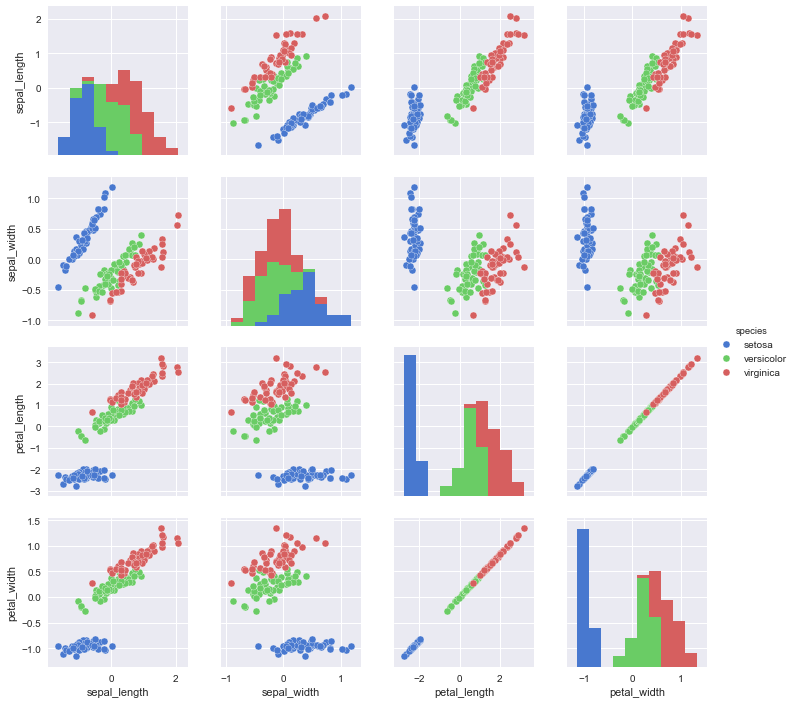

In [31]:
# realizamos un pairplot a partir de los datos reducidos
g = sns.pairplot(iris_svd, hue="species")

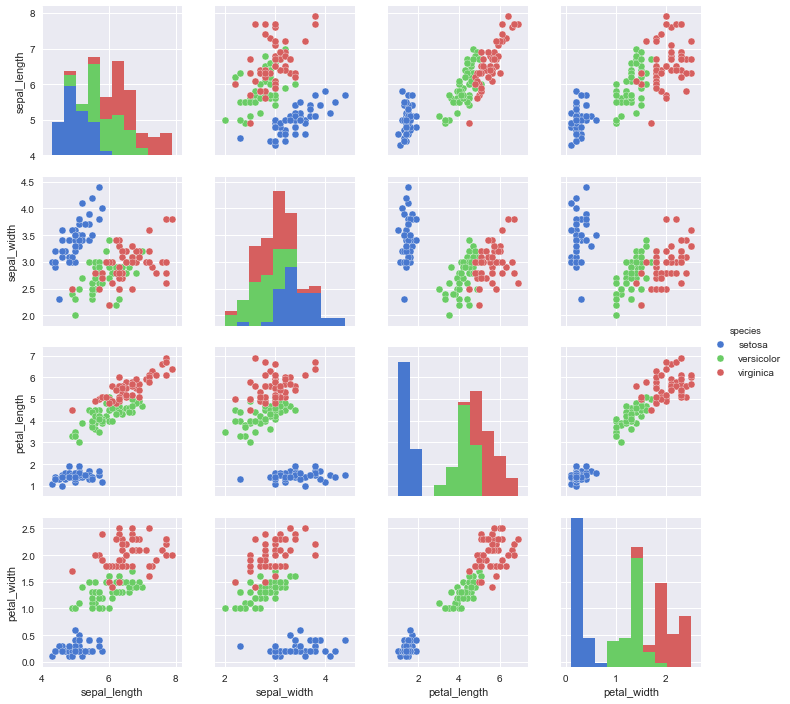

In [32]:
# realizamos un pairplot de los datos originales para comparar
g = sns.pairplot(iris, hue="species")

### Nota: 'Reduced' o 'Truncated' SVD

- La misma se puede usar desde scipy y permite calcular una descomposicion hasta el k-esimo valor singular. 
- Son computacionalmente **menos** costosas. 
- Hay que tener alguna consideraciones para operar con sus matrices.

In [34]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html
k = 3
uk, sk, vtk = svds(centered,k)

In [35]:
# https://stackoverflow.com/questions/24498854/singular-values-sorted-in-descending-order-using-svds-from-scipy-sparse-linalg
sk[::-1]

array([25.09996044,  6.01314738,  3.41368064])